In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big_Data/WHR2023.csv')

print (df.columns)
df.head()

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


資料前處裡

In [2]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [3]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                136 non-null    object 
 1   Ladder score                                136 non-null    float64
 2   Standard error of ladder score              136 non-null    float64
 3   upperwhisker                                136 non-null    float64
 4   lowerwhisker                                136 non-null    float64
 5   Logged GDP per capita                       136 non-null    float64
 6   Social support                              136 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                136 non-null    float64
 9   Generosity                                  136 non-null    float64
 10  Perceptions of

所有國家的幸福分數盒鬚圖分析

5.544441176470588


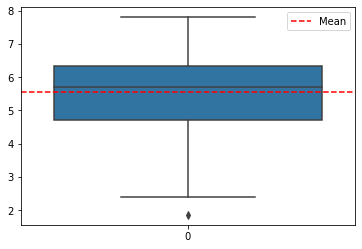

In [4]:
sns.boxplot(df["Ladder score"])
mean_val = df["Ladder score"].mean()
print (mean_val)
plt.axhline(mean_val, color="r", linestyle="--", label="Mean")
plt.legend()
plt.show()

找尋是否有台灣

In [5]:
taiwan = df[df['Country name'].str.contains('taiwan', case=False)]
taiwan=pd.DataFrame(taiwan)
taiwan.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
26,Taiwan Province of China,6.535,0.047,6.627,6.444,10.797,0.884,69.6,0.804,-0.129,0.681,1.778,1.89,1.372,0.492,0.562,0.067,0.178,1.974


所有欄位的平均數與台灣的比較

<ipython-input-6-075ebd2ea8a5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()


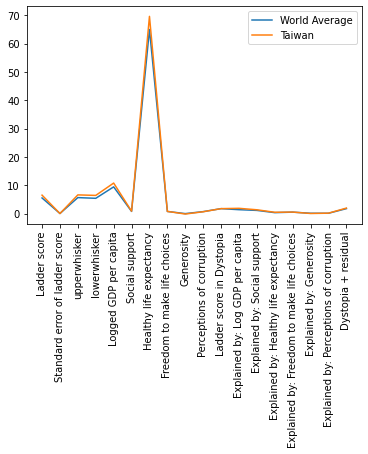

In [6]:
means = df.mean()
fig, ax = plt.subplots()
taiwan = df[df["Country name"] == "Taiwan Province of China"]

# 繪製折線圖
plt.plot(means, label="World Average")
plt.plot(taiwan.iloc[0, 1:], label="Taiwan")
plt.xticks(rotation=90)
plt.legend()
plt.show()

排除預期健康壽命欄位

<ipython-input-7-d56e6f0647ee>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means=df1.mean()


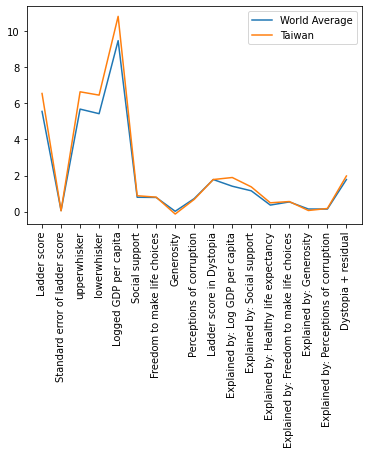

In [7]:
df1=df.drop('Healthy life expectancy', axis=1)
means=df1.mean()
fig, ax = plt.subplots()
taiwan=df1[df1["Country name"] == "Taiwan Province of China"]

plt.plot(means, label="World Average")
plt.plot(taiwan.iloc[0, 1:], label="Taiwan")
plt.xticks(rotation=90)
plt.legend()
plt.show()

資料處裡 將台灣移到第一列

In [8]:
tw_index=26
tw_row=df.loc[tw_index,:]
df = pd.concat([tw_row.to_frame().T, df.drop(tw_index)])
df = df.reset_index(drop=True)



快樂指數比較圖


5.544441176470589


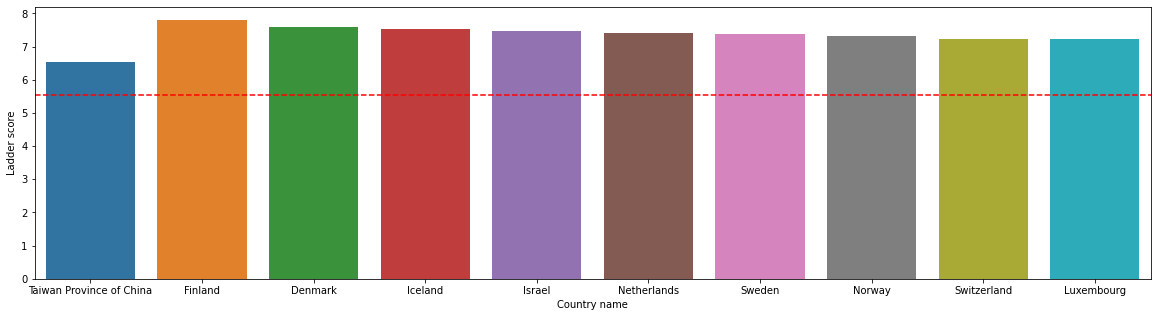

In [9]:
plt.figure(figsize=(20,5))
mean_val=df['Ladder score'].mean()
print(mean_val)
score_df=df.sort_values('Ladder score', ascending=False)
plt.axhline(mean_val, color="r", linestyle="--", label="Mean")
sns.barplot(x='Country name', y='Ladder score',data=df.iloc[:10])
plt.show()

所有資料比較圖

Ladder score
5.544441176470589


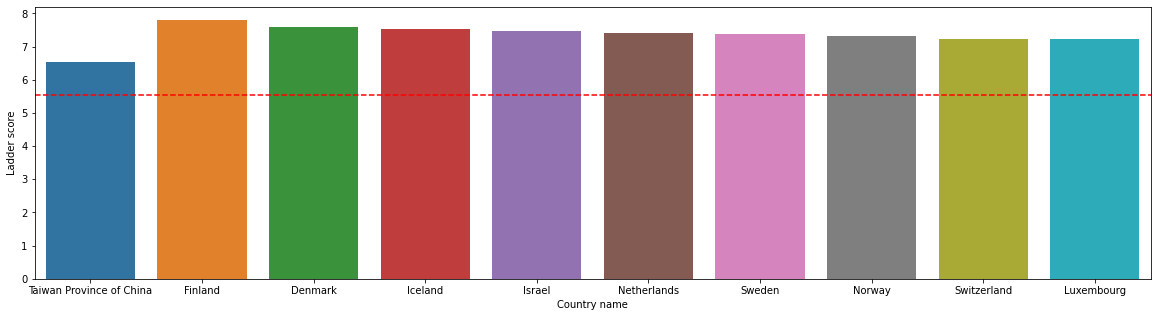

Standard error of ladder score
0.06451470588235296


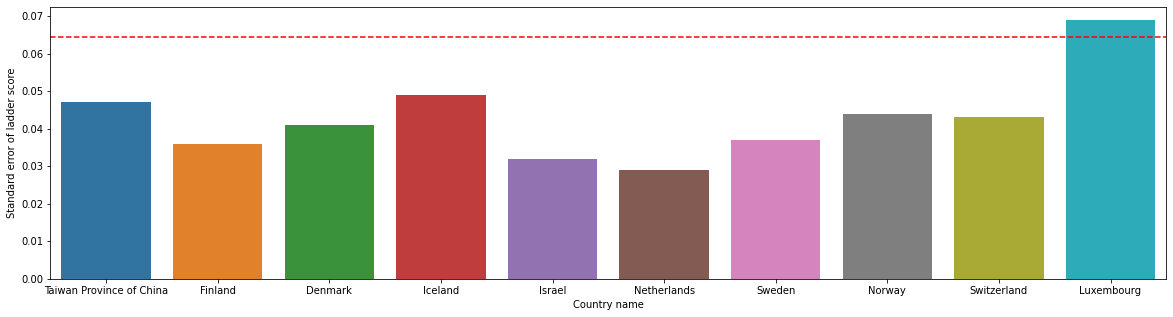

upperwhisker
5.670772058823531


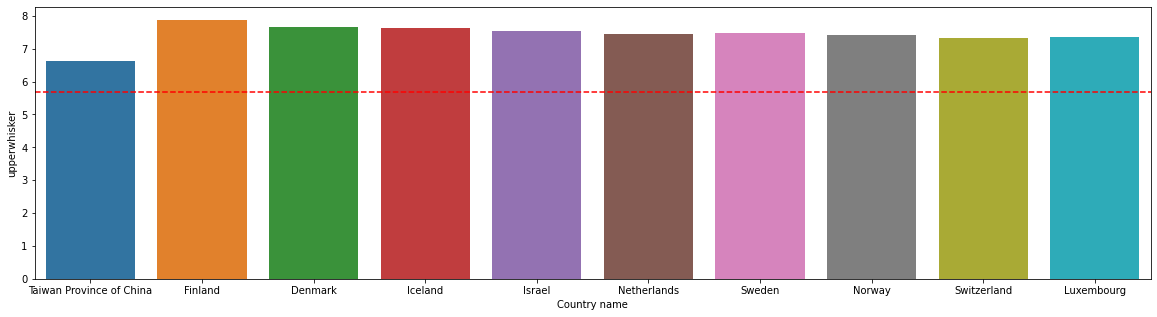

lowerwhisker
5.418014705882354


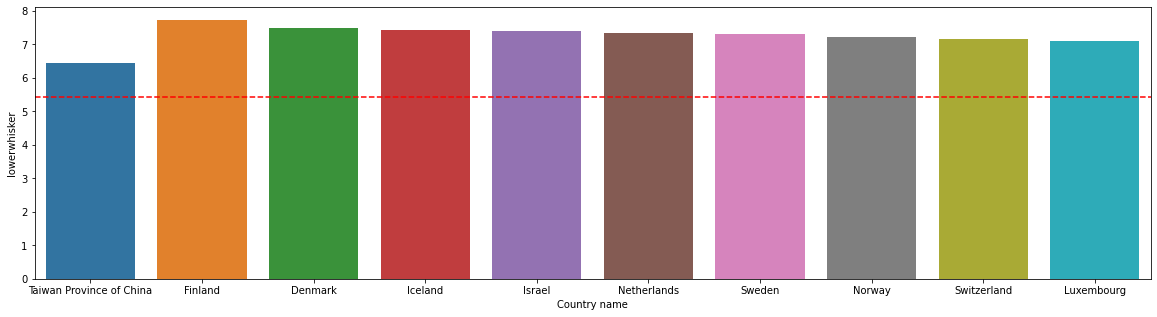

Logged GDP per capita
9.455191176470585


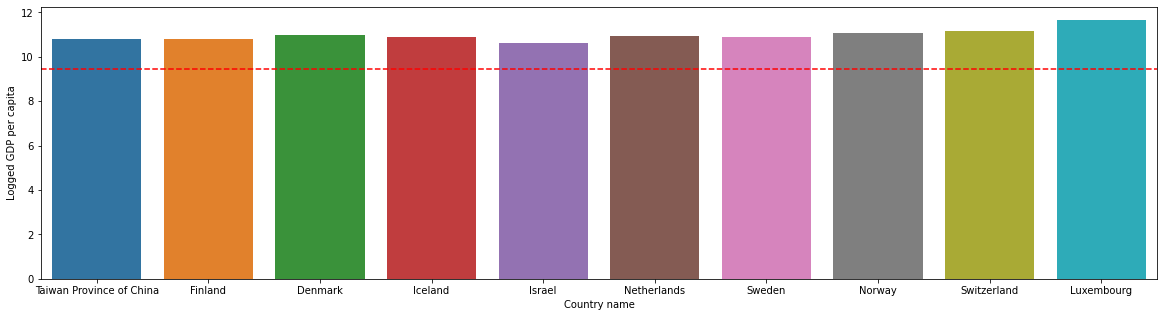

Social support
0.798632352941177


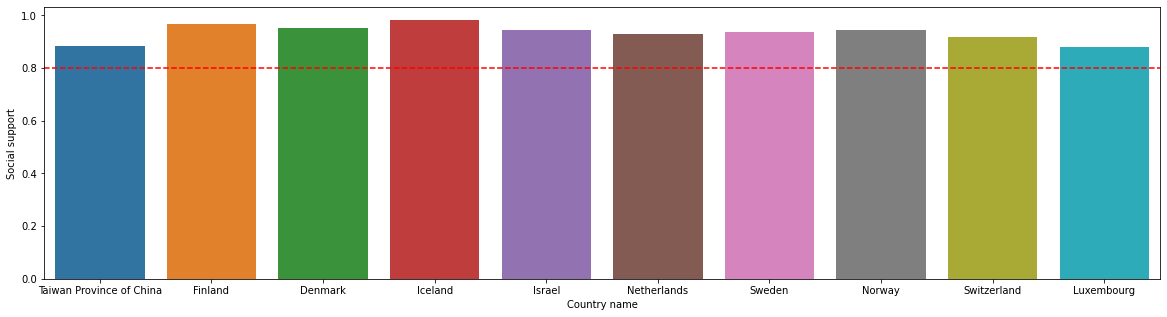

Healthy life expectancy
64.96763235294114


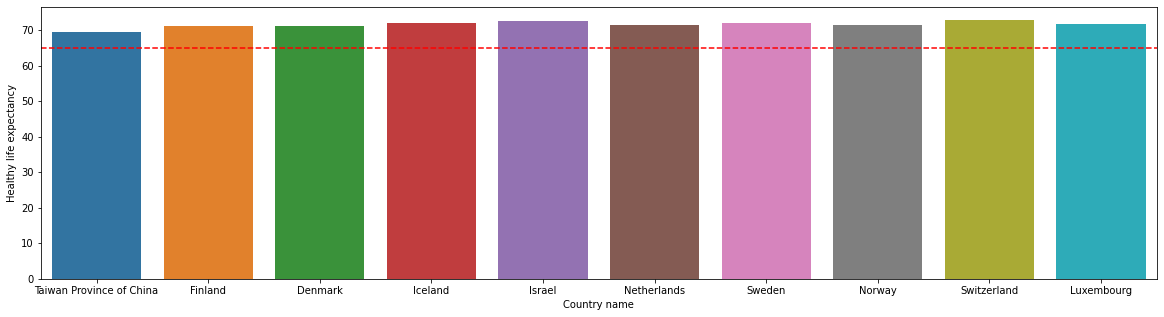

Freedom to make life choices
0.7880808823529415


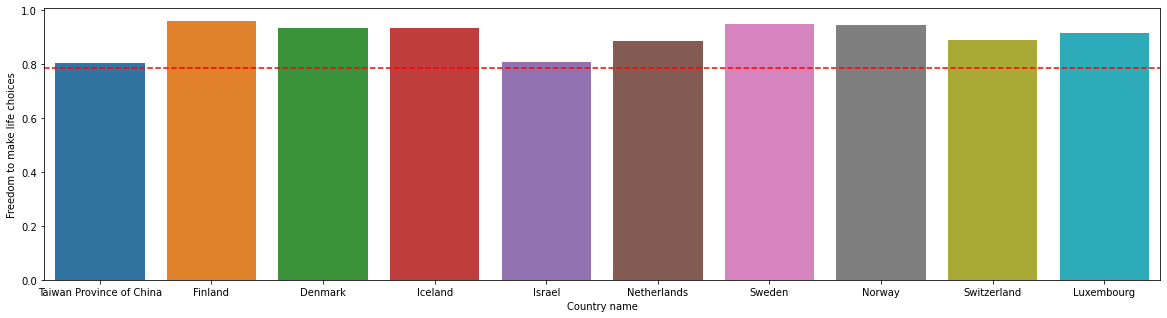

Generosity
0.023566176470588233


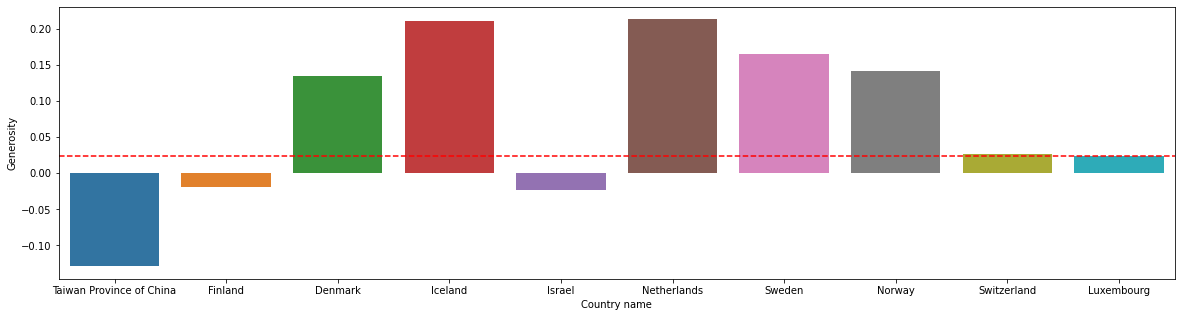

Perceptions of corruption
0.7245882352941178


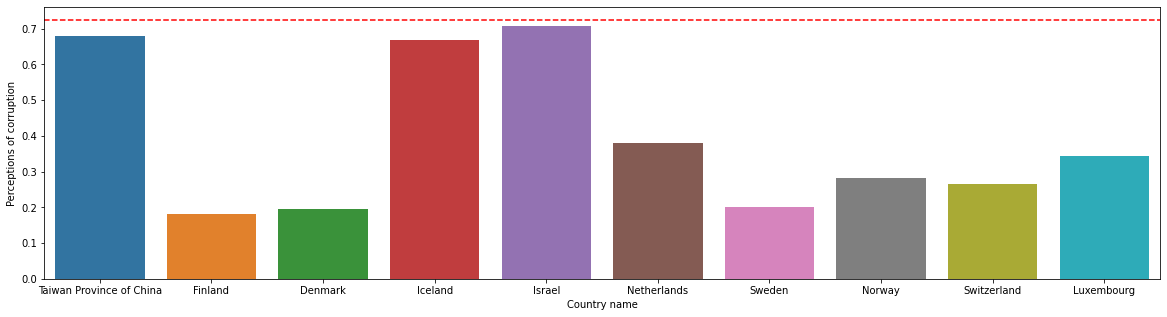

Ladder score in Dystopia
1.7779999999999971


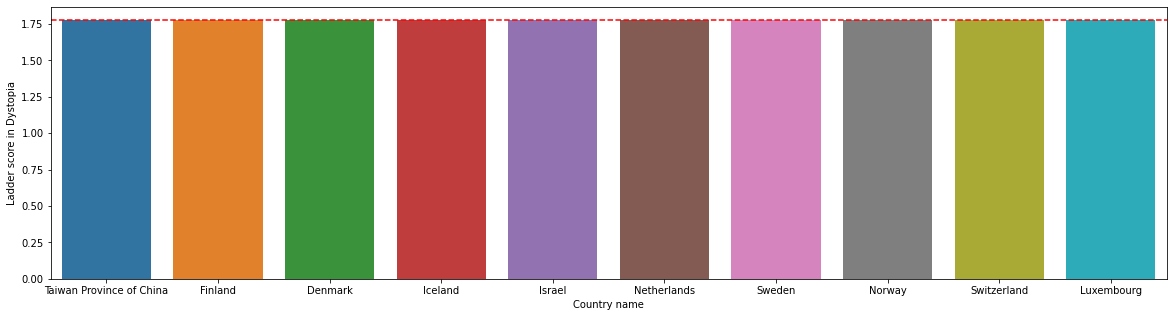

In [10]:
for column in df.columns[1:12]:
  plt.figure(figsize=(20,5))
  print(column)
  mean_val=df[column].mean()
  print(mean_val)
  score_df=df.sort_values(column, ascending=False)
  plt.axhline(mean_val, color="r", linestyle="--", label="Mean")
  sns.barplot(x='Country name', y=column,data=df.iloc[:10])
  plt.show()

將幸福指數資料切成Bins '非常不幸福','不幸福',"幸福","非常幸福"

very unhappy    34
happy           34
very happy      34
unhappy         33
Name: Ladder_score_group, dtype: int64


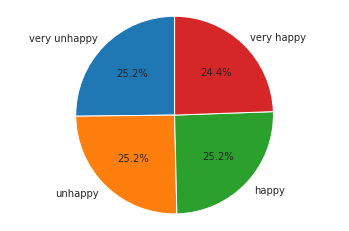

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big_Data/WHR2023.csv')
labels=['very unhappy','unhappy',"happy","very happy"]
#4分位數
df['Ladder_score_group']=pd.cut(df["Ladder score"], bins=df['Ladder score'].describe()[['min', '25%', '50%','75%', 'max']],labels=['very unhappy','unhappy',"happy","very happy"])
df.dropna(inplace=True)
counts = df['Ladder_score_group'].value_counts()
print(counts)

sizes = counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()


比較幸福程度與健康壽命相關

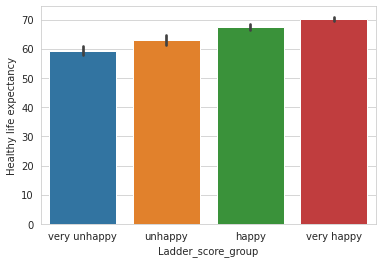

In [12]:
labels=['very unhappy','unhappy',"happy","very happy"]
means=[]

for label in labels:
  mean=df.loc[df['Ladder_score_group'] == label, 'Healthy life expectancy'].mean()
  means.append(mean)

sns.set_style('whitegrid')
sns.barplot(x='Ladder_score_group', y='Healthy life expectancy', data=df)
plt.show()

比較幸福程度與所有關係

Ladder score


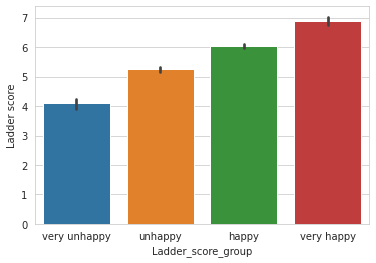

Standard error of ladder score


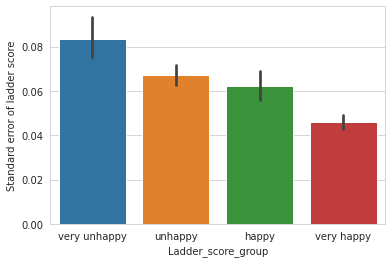

upperwhisker


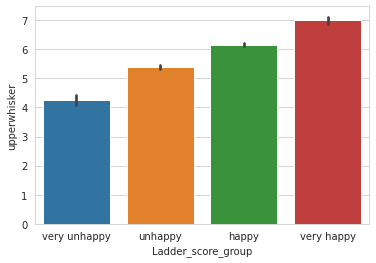

lowerwhisker


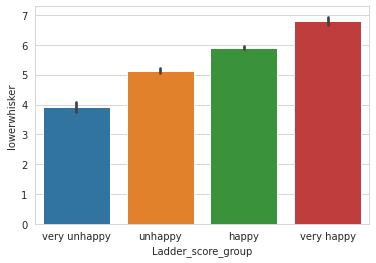

Logged GDP per capita


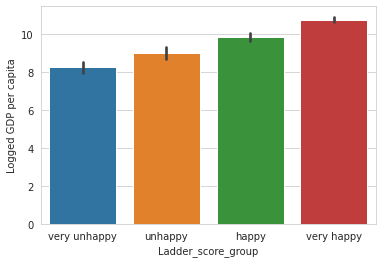

Social support


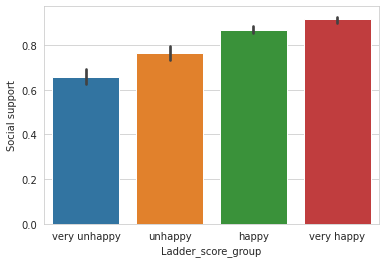

Healthy life expectancy


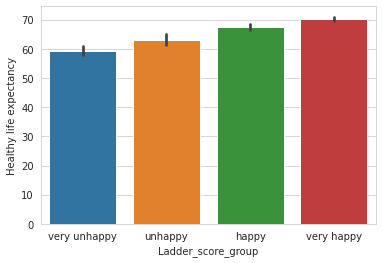

Freedom to make life choices


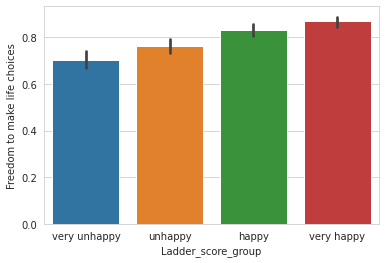

Generosity


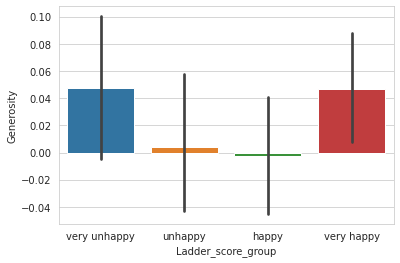

Perceptions of corruption


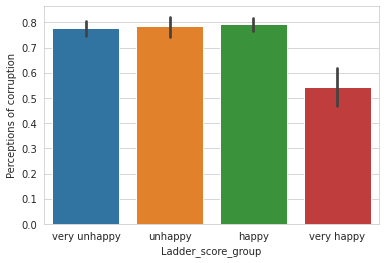

Ladder score in Dystopia


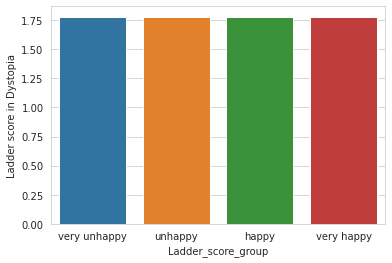

In [13]:
labels=['very unhappy','unhappy',"happy","very happy"]

means=[]
for column in df.columns[1:12]:
  for label in labels:
    mean=df.loc[df['Ladder_score_group'] == label, column].mean()
    means.append(mean)
  print(column)
  sns.set_style('whitegrid')
  sns.barplot(x='Ladder_score_group', y=column, data=df)
  plt.show()